<center><h2>
<a href="https://rebrand.ly/github-of-masum">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [31]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dask import dataframe as dd
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

In [32]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\Cleaned_Data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

In [33]:
df.nunique()

Protocol                         3
Flow Duration               143257
Total Fwd Packets              365
Total Backward Packets         140
Fwd Packets Length Total      2625
                             ...  
Idle Mean                    65588
Idle Std                     52351
Idle Max                     65560
Idle Min                     65445
Label                           13
Length: 78, dtype: int64

#### Dropping categorical columns that have one category predominance

In [34]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Performing drop operation & saving that in new csv

In [35]:
df.drop(columns=unique_value_columns, inplace=True)
df.shape

(409000, 66)

In [36]:
def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

newCsvPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "after_dropping_unique_data_containing_features.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newCsvPath, file_name=csvFileName)

#### As we visualized the heatmap of the remaining 66 features, now need to find out the co-relation pairs
#### But Before that, need to apply encoding of categorical data, such as "Label" feature

In [37]:
le = preprocessing.LabelEncoder()
before_encoding_dataframe = df.copy(deep=True)
before_encoding_dataframe.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
114          6        9342857                  4                       0   
638         17              2                  2                       0   
364         17              3                  2                       0   
1391        17         246910                  6                       0   
1225        17         106903                  4                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
114                        0.0                       0.0   
638                      946.0                       0.0   
364                      828.0                       0.0   
1391                    2054.0                       0.0   
1225                    1398.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
114                     0.0                    0.0                0.000000   
638                   473.0                  473.0              473.000000   
364                   414.0                  414.0              414.000000   
1391                  374.0                  322.0              342.333344   
1225                  369.0                  330.0              349.500000   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
114                0.000000  ...                20         51.0         0.0   
638                0.000000  ...               425          0.0         0.0   
364                0.000000  ...                 0          0.0         0.0   
1391              24.856924  ...                20          0.0         0.0   
1225              22.516661  ...                 8          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std   Idle Max   Idle Min  \
114         51.0        51.0  9342805.0       0.0  9342805.0  9342805.0   
638          0.0         0.0        0.0       0.0        0.0        0.0   
364          0.0         0.0        0.0       0.0        0.0        0.0   
1391         0.0         0.0        0.0       0.0        0.0        0.0   
1225         0.0         0.0        0.0       0.0        0.0        0.0   

            Label  
114           Syn  
638   DrDoS_MSSQL  
364   DrDoS_MSSQL  
1391    DrDoS_UDP  
1225    DrDoS_UDP  

[5 rows x 66 columns]

In [38]:
df["Label"] = le.fit_transform(df["Label"])
df["Label"] = pd.to_numeric(df['Label'], downcast='integer')
df.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
114          6        9342857                  4                       0   
638         17              2                  2                       0   
364         17              3                  2                       0   
1391        17         246910                  6                       0   
1225        17         106903                  4                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
114                        0.0                       0.0   
638                      946.0                       0.0   
364                      828.0                       0.0   
1391                    2054.0                       0.0   
1225                    1398.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
114                     0.0                    0.0                0.000000   
638                   473.0                  473.0              473.000000   
364                   414.0                  414.0              414.000000   
1391                  374.0                  322.0              342.333344   
1225                  369.0                  330.0              349.500000   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
114                0.000000  ...                20         51.0         0.0   
638                0.000000  ...               425          0.0         0.0   
364                0.000000  ...                 0          0.0         0.0   
1391              24.856924  ...                20          0.0         0.0   
1225              22.516661  ...                 8          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std   Idle Max   Idle Min  Label  
114         51.0        51.0  9342805.0       0.0  9342805.0  9342805.0      9  
638          0.0         0.0        0.0       0.0        0.0        0.0      3  
364          0.0         0.0        0.0       0.0        0.0        0.0      3  
1391         0.0         0.0        0.0       0.0        0.0        0.0      8  
1225         0.0         0.0        0.0       0.0        0.0        0.0      8  

[5 rows x 66 columns]

<center><h3 style="background:#FF00FF;color:black">
Encoding of "Label" visualization
</h3></center>

In [39]:
Label_keys = list(before_encoding_dataframe.Label)
Label_values = list(df.Label)
# Label_tuples = list(zip(Label_keys,Label_values)) # # creating tuples from above two lists
# Label_visualize_df = pd.DataFrame(Label_tuples, columns=['Label','Encoding'])
Label_dict = dict(Label = Label_keys,Encoding = Label_values)
Label_visualize_df = pd.DataFrame.from_dict(Label_dict)
Label_visualize_df.drop_duplicates(inplace=True)
Label_visualize_df.reset_index(inplace=True, drop=True)
Label_visualize_df

Label  Encoding
0             Syn         9
1     DrDoS_MSSQL         3
2       DrDoS_UDP         8
3       DrDoS_NTP         4
4      DrDoS_SSDP         7
5   DrDoS_NetBIOS         5
6         UDP-lag        11
7      DrDoS_LDAP         2
8      DrDoS_SNMP         6
9            TFTP        10
10      DrDoS_DNS         1
11         BENIGN         0
12        WebDDoS        12

<center><h4 style="background:#ADFF2F;color:black">
Saving the after encoding dataframe into new csv
</h4></center>

In [40]:
dirPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "After_Label_Encoding.csv"
encodingFileName = "Label_Encoding.csv"

Label_visualize_df.to_csv(dirPath+encodingFileName)
df.to_csv(dirPath + csvFileName)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409000 entries, 114 to 17
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  409000 non-null  int64  
 1   Flow Duration             409000 non-null  int64  
 2   Total Fwd Packets         409000 non-null  int64  
 3   Total Backward Packets    409000 non-null  int64  
 4   Fwd Packets Length Total  409000 non-null  float64
 5   Bwd Packets Length Total  409000 non-null  float64
 6   Fwd Packet Length Max     409000 non-null  float64
 7   Fwd Packet Length Min     409000 non-null  float64
 8   Fwd Packet Length Mean    409000 non-null  float64
 9   Fwd Packet Length Std     409000 non-null  float64
 10  Bwd Packet Length Max     409000 non-null  float64
 11  Bwd Packet Length Min     409000 non-null  float64
 12  Bwd Packet Length Mean    409000 non-null  float64
 13  Bwd Packet Length Std     409000 non-null  flo

<center><h3 style="background:orange;color:black">
Hypothesis Testing
</h3></center>

##### Null Hypothesis(H0): There exists no co-relation between two features
##### Alternative Hypothesis (H1): opposite of null hypothesis

<center><h3 style="background:yellow;color:black">
Chi-Squared Test
</h3></center>

In [41]:
from scipy.stats import chi2_contingency
def chi_squared_test(feature1,feature2):
    stat ,p, dof, expected = chi2_contingency(pd.crosstab(feature1,feature2))
    alpha = 0.05
    if p > alpha:
        return f"They are independent & P-value: {p}"
    else:
        return f"Co-related & P-value: {p}"

In [42]:
present_columns = sorted(df)
present_columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

##### Relation between Syn Flag count vs Protocol

In [43]:
pd.crosstab(df['SYN Flag Count'],df['Protocol'])

Protocol         0      6       17
SYN Flag Count                    
0               344  76009  332533
1                 0    114       0

In [44]:
chi_squared_test(df['SYN Flag Count'],df['Protocol'])

'Co-related & P-value: 5.24843500768918e-109'

##### Relation between RST Flag count vs Protocol

In [45]:
pd.crosstab(df['RST Flag Count'],df['Protocol'])

Protocol         0      6       17
RST Flag Count                    
0               344  75097  332533
1                 0   1026       0

In [46]:
chi_squared_test(df['RST Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between CWE Flag count vs Protocol

In [47]:
pd.crosstab(df['CWE Flag Count'],df['Protocol'])

Protocol         0      6       17
CWE Flag Count                    
0               344  73778  332533
1                 0   2345       0

In [48]:
chi_squared_test(df['CWE Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between URG Flag count vs Protocol

In [49]:
pd.crosstab(df['URG Flag Count'],df['Protocol'])

Protocol         0      6       17
URG Flag Count                    
0               344  71593  332533
1                 0   4530       0

In [50]:
chi_squared_test(df['URG Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

<center><h3 style="background:yellow;color:black">
T Test
</h3></center>

In [51]:
from scipy.stats import ttest_ind
def t_value_test(feature1,feature2):
    score = ttest_ind(feature1,feature2,equal_var=False)[1]
    if score > 0.05:
        return f"Co-related & T-score: {score}"
    return f"They are independent & T-score: {score}"

##### Relation between Flow Duration vs FWD IAT Total

In [52]:
t_value_test(df['Flow Duration'],df['Fwd IAT Total'])

'Co-related & T-score: 0.8868497655037039'

<center><h3 style="background:yellow;color:black">
Pearson co-variance implementation
</h3></center>

In [53]:
Pearson_Threshold = 0.9
count = 0
for i in df.columns:
   for j in df.columns:
       if i!= j:
           corr,_ = stats.pearsonr(df[i],df[j])
           if corr >= Pearson_Threshold:
               count = count + 1
               print(f"Pearson co-relation between {i} & {j} : {corr:.3f}")

print("\n###########################################################################")
print(f"Found above pearson threshold co-related pairs: {count}")

Pearson co-relation between Flow Duration & Fwd IAT Total : 1.000
Pearson co-relation between Total Fwd Packets & Subflow Fwd Packets : 1.000
Pearson co-relation between Total Backward Packets & Subflow Bwd Packets : 1.000
Pearson co-relation between Fwd Packets Length Total & Subflow Fwd Bytes : 1.000
Pearson co-relation between Fwd Packets Length Total & Fwd Act Data Packets : 0.997
Pearson co-relation between Bwd Packets Length Total & Subflow Bwd Bytes : 1.000
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Min : 0.987
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Packet Length Min : 0.986
Pearson co-relation between Fwd Packet Length Max & Packet Length Max : 0.979
Pearson co-relation between Fwd Packet Length Max & Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Avg Packet Size : 0.986
Pearson co-relation between Fwd Packet Length Max & Avg

<center><h3 style="background:orange;color:black">
Need to reduce dimentionality of those above co-related pairs using PCA
</h3></center>

##### But before applying PCA, need to data standardization & Compute the covariance matrix

In [54]:
Y = df["Label"]
X = df.drop("Label",axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_std = StandardScaler().fit_transform(X) # data standardized / scaled here
X_norm = preprocessing.normalize(X_std)
mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat # 65 rows & 65 columns

array([[ 1.00000244, -0.7531957 , -0.06263539, ..., -0.63364611,
        -0.75308395, -0.63974858],
       [-0.7531957 ,  1.00000244, -0.00272005, ...,  0.78406062,
         0.8703841 ,  0.64706931],
       [-0.06263539, -0.00272005,  1.00000244, ..., -0.00614998,
        -0.00814798, -0.00761259],
       ...,
       [-0.63364611,  0.78406062, -0.00614998, ...,  1.00000244,
         0.80298793,  0.44621051],
       [-0.75308395,  0.8703841 , -0.00814798, ...,  0.80298793,
         1.00000244,  0.88018429],
       [-0.63974858,  0.64706931, -0.00761259, ...,  0.44621051,
         0.88018429,  1.00000244]])

#### Plotting the co-variance matrix (it just too blurry)

cov_mat_img = plt.matshow(cov_mat,cmap=plt.cm.rainbow)
plt.colorbar(cov_mat_img,ticks=[-1,0,1],fraction=0.025)
# for x in range(cov_mat.shape[0]):
#     for y in range(cov_mat.shape[1]):
#         plt.text(x, y, "%0.2f" % cov_mat[x,y], size=12, color='black', ha="center", va="center")
plt.figure(figsize=(60,60))
plt.show()

#### Eigen decomposition of co-variance matrix

In [56]:
eig_values, eigen_vec = np.linalg.eig(cov_mat)
print(f"Eigen Vectors of co-variance matrix:\n {eigen_vec}")
print("\n###################################################################\n")
print(f"Eigen values of co-variance matrix:\n {eig_values}")

Eigen Vectors of co-variance matrix:
 [[ 2.07542623e-01+0.j  3.56265677e-03+0.j  5.47224287e-02+0.j ...
  -9.89755500e-14+0.j  6.67177089e-14+0.j -1.54364694e-13+0.j]
 [-2.07506203e-01+0.j  4.21681386e-02+0.j -1.29574753e-01+0.j ...
   4.02145649e-11+0.j -2.19163199e-11+0.j  4.76536986e-11+0.j]
 [-2.63493251e-03+0.j -9.90849650e-03+0.j  1.28881175e-02+0.j ...
  -1.90950326e-01+0.j  3.42768388e-02+0.j  7.91561319e-03+0.j]
 ...
 [-1.76025769e-01+0.j  5.24085826e-02+0.j -1.14777177e-01+0.j ...
  -6.39184934e-14+0.j  3.66134533e-14+0.j -7.89915076e-14+0.j]
 [-2.22397412e-01+0.j  5.46169711e-02+0.j -1.46306014e-01+0.j ...
   8.49911573e-13+0.j -4.96934673e-13+0.j  1.07218221e-12+0.j]
 [-1.96956447e-01+0.j  4.24030884e-02+0.j -1.27840291e-01+0.j ...
  -8.42716835e-14+0.j  4.74027072e-14+0.j -9.71922458e-14+0.j]]

###################################################################

Eigen values of co-variance matrix:
 [ 1.61836020e+01+0.0000000e+00j  6.83659057e+00+0.0000000e+00j
  5.91620280

#### Now need to select the principal components

In [57]:
eig_pairs = [(np.abs(eig_values[i]),eigen_vec[:,i]) for i in range(len(eig_values))]
# here, eig_pairs data_types are list of tuples(eig_values,eigen_vec)
# need to sort in descending order
eig_pairs.sort(key=lambda x: x[0],reverse=True)
# ok need to visualize the descending sort of eigen pairs
for i,j in enumerate(eig_pairs):
    print(i,j[0])

0 16.183602007919923
1 6.836590566019321
2 5.916202800548313
3 3.587508523903322
4 3.0892678777356766
5 3.0124821221847187
6 2.5035906684702263
7 2.4795592733050134
8 2.008387416799945
9 1.9946283816976411
10 1.9185307068442408
11 1.8367287978510318
12 1.2822631330510355
13 1.2380118266193265
14 1.1482483327441733
15 1.117402997497939
16 1.023885475451668
17 0.9817186866443972
18 0.9564415096180551
19 0.8989501913687011
20 0.8291008274916253
21 0.7688425259223955
22 0.6954884314855408
23 0.5654714861397658
24 0.3787556627153013
25 0.3356999303089572
26 0.29849983049130036
27 0.23112704611740867
28 0.220769029073778
29 0.15235082986430337
30 0.12134324631720725
31 0.10259932033371996
32 0.0943273512337355
33 0.043774871803497824
34 0.037153808221540366
35 0.022339731917341607
36 0.02173530573916774
37 0.01868697463925831
38 0.011804114172663593
39 0.00725618948766266
40 0.006279851637269218
41 0.004170826087388768
42 0.003932695144391703
43 0.002959488855441032
44 0.002432294645663977
4

##### after 54, it seems it has too little insignificance

##### Explained Variance

In [58]:
tot = sum(eig_values)
exp_var = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
# exp_var

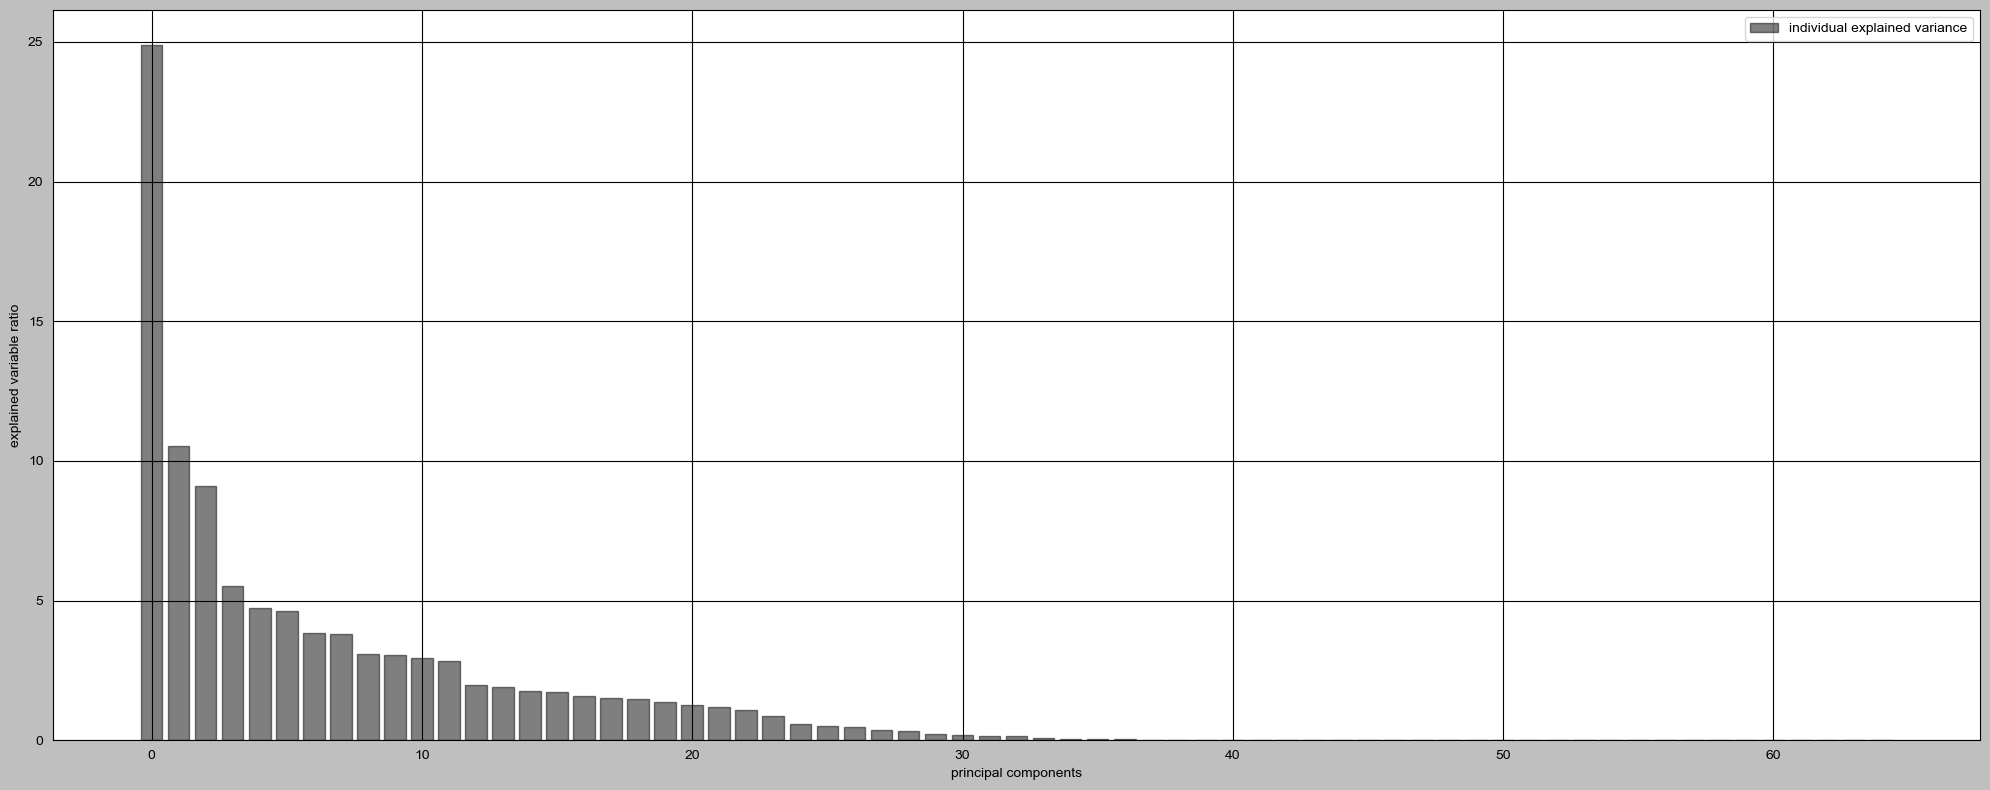

In [59]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_explained_variance.png"
with plt.style.context(style="grayscale"):
    plt.figure(figsize=(20,8))
    plt.bar(x=range(len(X.columns)),height=exp_var,alpha=0.5,align="center",label="individual explained variance")
    plt.legend(loc="best")
    plt.xlabel("principal components")
    plt.ylabel("explained variable ratio")
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

##### Camulative Explained Variance

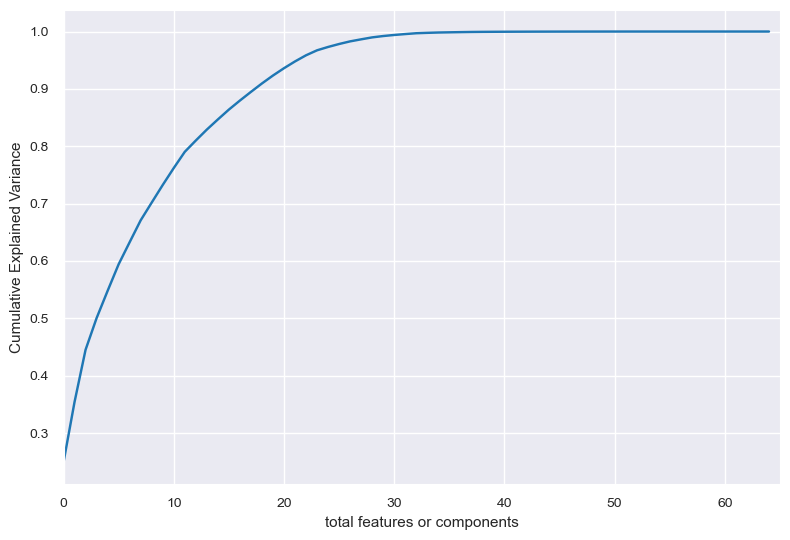

In [61]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_Cumulative_explained_variance.png"

with plt.style.context(style="seaborn-notebook"):
    pca = PCA().fit(X_std) # note: Here to draw the cumulative distribution graph, PCA is fitted into Standardized independent variables
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("total features or components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xlim(0,len(X.columns),1)
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

In [87]:
model = PCA(n_components=0.99999).fit(X_norm)
X_pc = model.transform(X_norm)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
# get the names
pca_features = list(set(initial_feature_names[most_important[i]] for i in range(n_pcs)))
print(f"Principal Components: {n_pcs} \nSelected Features: {len(pca_features)}")
pca_features

Principal Components: 48 
Selected Features: 40


['Protocol',
 'Active Min',
 'Flow Packets/s',
 'Init Bwd Win Bytes',
 'Bwd Packet Length Min',
 'Active Max',
 'CWE Flag Count',
 'Idle Min',
 'Packet Length Std',
 'Bwd Header Length',
 'Bwd Packet Length Max',
 'Fwd Packet Length Std',
 'Bwd IAT Min',
 'Bwd IAT Total',
 'Init Fwd Win Bytes',
 'Packet Length Variance',
 'Bwd IAT Max',
 'Fwd Header Length',
 'ACK Flag Count',
 'Fwd Seg Size Min',
 'Avg Packet Size',
 'Packet Length Min',
 'Active Std',
 'Down/Up Ratio',
 'Idle Std',
 'Fwd Act Data Packets',
 'Flow IAT Mean',
 'Fwd IAT Mean',
 'Idle Mean',
 'Flow Bytes/s',
 'Bwd Packets/s',
 'Bwd Packet Length Std',
 'URG Flag Count',
 'SYN Flag Count',
 'Subflow Fwd Packets',
 'Fwd IAT Min',
 'RST Flag Count',
 'Fwd Packet Length Max',
 'Subflow Bwd Bytes',
 'Bwd IAT Mean']

#### But some features did not selected in PCA though we performed hypothesis testing & decided to keep those features. As PCA is unsupervised Learning Technique & itt only looks for the variances impact over dataset, that's why some features like (URG, CWE, FWD Push flags to keep & Fwd IAT total) from T value & Chi-Square Test

In [94]:
features_from_hypothesis_test = ['Flow Duration','Fwd IAT Total','URG Flag Count','CWE Flag Count','RST Flag Count','SYN Flag Count','Protocol']
s1 = set(pca_features)
s2 = set(features_from_hypothesis_test)
final_selected_features = list(s1.union(s2))
print(f"Final Selected Features: {len(final_selected_features)}")
final_selected_features

Final Selected Features: 42


['Protocol',
 'Active Min',
 'Flow Packets/s',
 'Init Bwd Win Bytes',
 'Bwd Packet Length Min',
 'Active Max',
 'CWE Flag Count',
 'Idle Min',
 'Packet Length Std',
 'Bwd Header Length',
 'Bwd Packet Length Max',
 'Fwd Packet Length Std',
 'Bwd IAT Min',
 'Bwd IAT Total',
 'Init Fwd Win Bytes',
 'Packet Length Variance',
 'Bwd IAT Max',
 'Fwd Header Length',
 'ACK Flag Count',
 'Fwd Seg Size Min',
 'Avg Packet Size',
 'Packet Length Min',
 'Active Std',
 'Down/Up Ratio',
 'Idle Std',
 'Fwd Act Data Packets',
 'Flow IAT Mean',
 'Fwd IAT Mean',
 'Fwd IAT Total',
 'Idle Mean',
 'Flow Bytes/s',
 'Bwd Packets/s',
 'Bwd Packet Length Std',
 'Flow Duration',
 'URG Flag Count',
 'SYN Flag Count',
 'Subflow Fwd Packets',
 'Fwd IAT Min',
 'RST Flag Count',
 'Fwd Packet Length Max',
 'Subflow Bwd Bytes',
 'Bwd IAT Mean']

<center><h2 style="background:#00FFFF;color:black">
Now need to keep only those final selected features & drop the rest to create model
</h2></center>

#### thaak ami khawa dawa kore ashtesi

# LIST COMPREHENSION HERE AGAIN
length = len(most_important_names)
dic = {'PC-{}'.format(i): most_important_names[i] for i in range(length)}

# build the dataframe
principal_components_df = pd.DataFrame(dic.items(),columns=['Principal Components','Features'])
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Principal_Components_using_PCA.csv"
principal_components_df.to_csv(filePath)
principal_components_df

<center><h4 style="background:yellow;color:black">
These Visualization should be done again after umdersampling & oversampling
</center></h4>

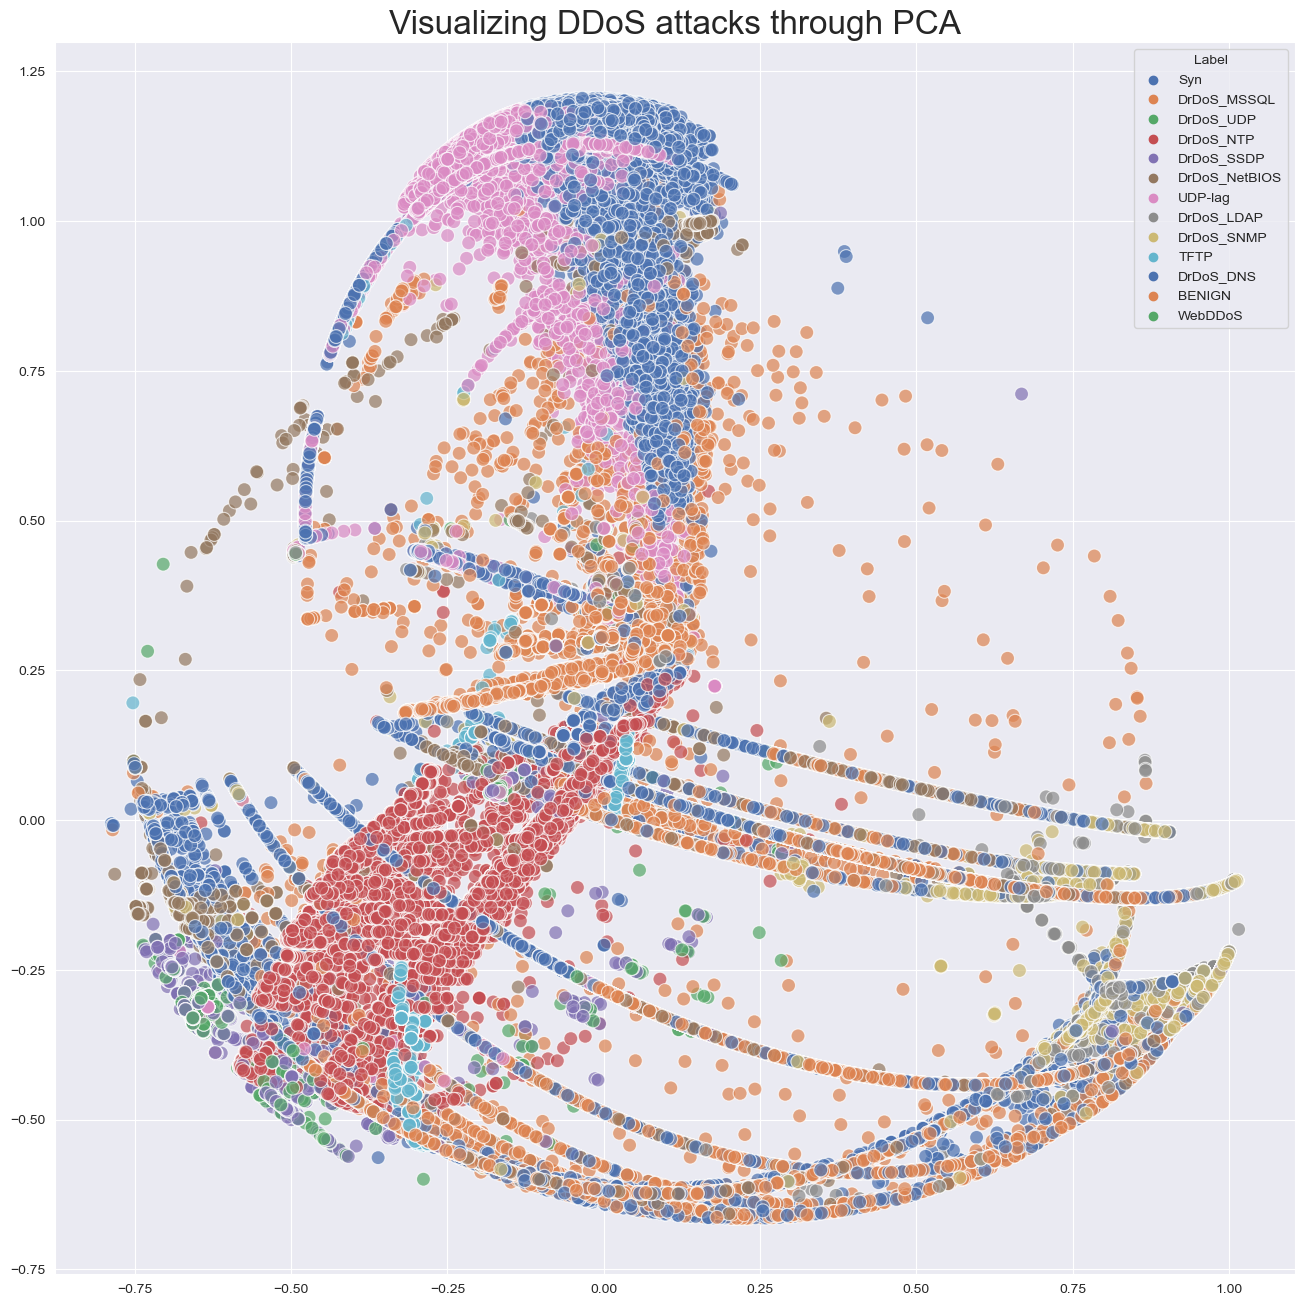

In [95]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA.png"
pca = PCA(n_components=0.99999)
principalComponents = pca.fit_transform(X_norm)
# principalComponents
plt.figure(figsize=(16,16))
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:, 1] , s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through PCA', fontsize=24)
plt.savefig(imgPath+imgName)

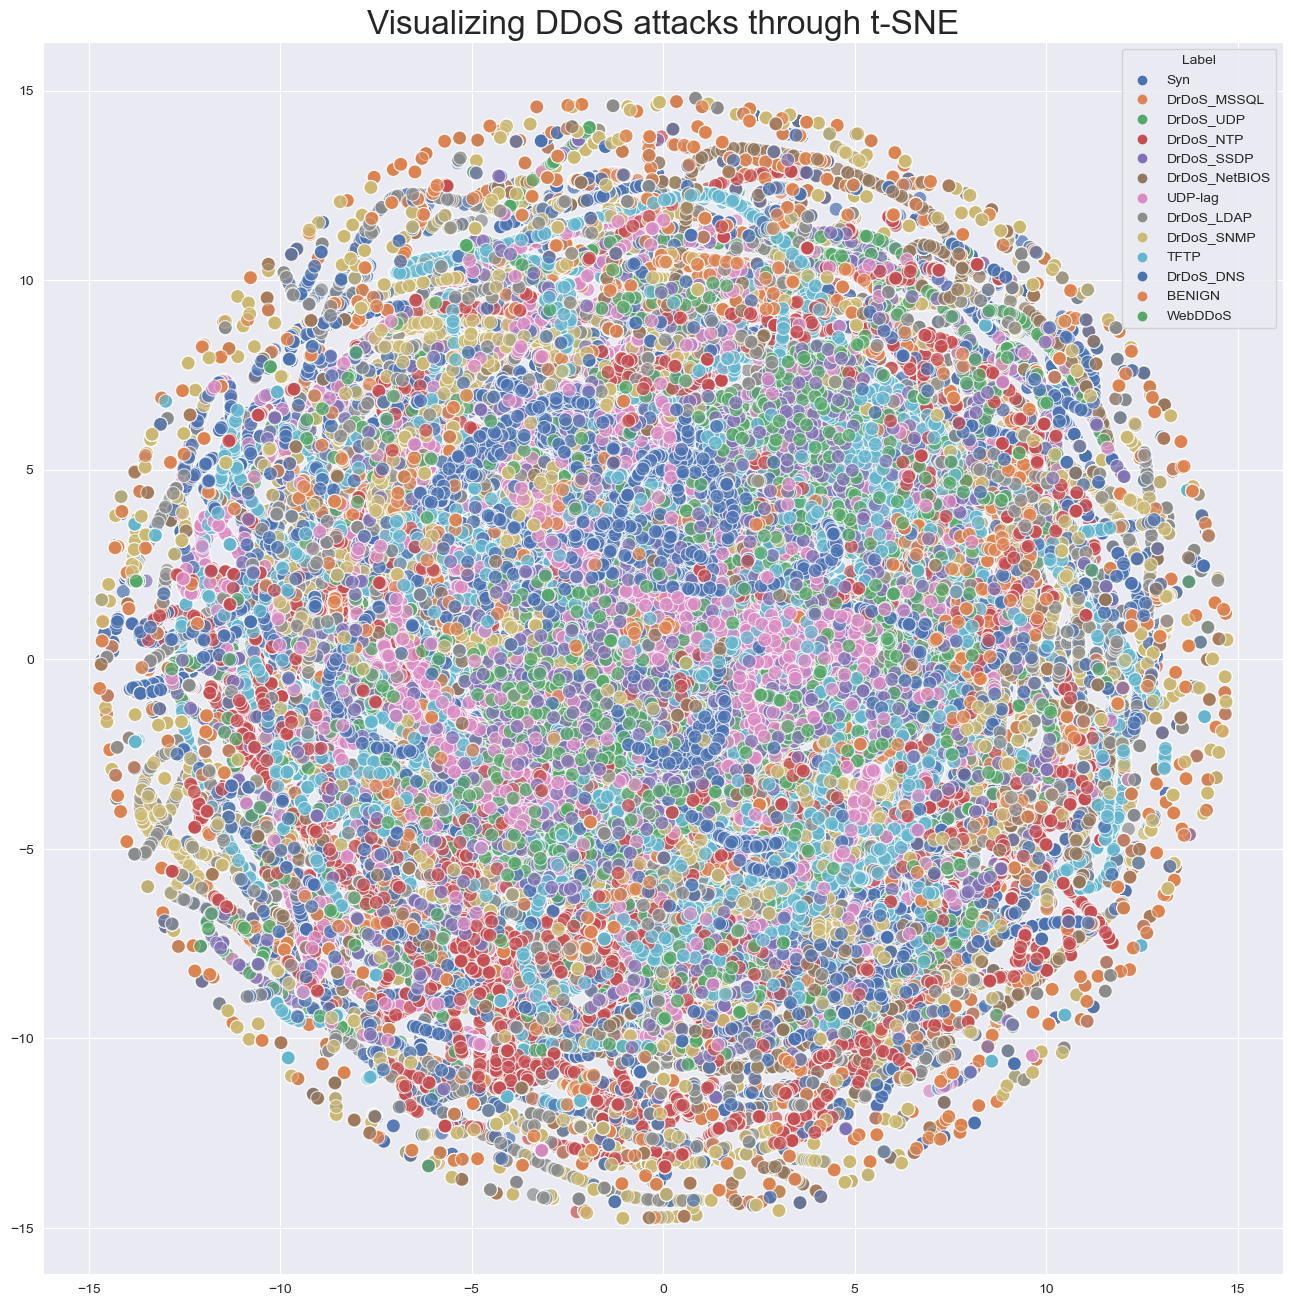

In [96]:
from sklearn.manifold import TSNE

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA_tSNE.png"

tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
sns.scatterplot(x=tsne_[:, 0], y=tsne_[:, 1], s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24)
plt.savefig(imgPath+imgName)

##### Clustering couln't be done due to memory error

In [79]:
from sklearn.cluster import AgglomerativeClustering

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_after_Agglomerate_Clustering.png"
Agglo = AgglomerativeClustering(n_clusters=3)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,16))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerate Clustering', fontsize=24);
plt.show()
plt.savefig(imgPath+imgName)

MemoryError: Unable to allocate 623. GiB for an array with shape (83640295500,) and data type float64